In [12]:
# Imports
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import cluster
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
from __future__ import division
import random
import geoplotlib
from geoplotlib.utils import BoundingBox

In [42]:
# Load data
df = pd.read_csv('../data/parkomat.csv', sep=',')
df.head()

FID        lon        lat   id  parkomat_id              type  vejkode  \
0    0  12.572666  55.679003  467          152            P-info     1396   
1    1  12.572937  55.679216  466          153  Betalingsautomat     1396   
2    2  12.566108  55.677827  470          156  Betalingsautomat      148   
3    3  12.565577  55.678517  471          157  Betalingsautomat     3348   
4    4  12.566308  55.679171  472          158            P-info     5220   

  p_zone beboer_zone                  vejnavn husnr              placering  \
0    RØD          NV                   DYRKØB     5                    NaN   
1    Rød          NV                   Dyrkøb  OF/3                    NaN   
2    RØD          RH  H C ANDERSENS BOULEVARD     9  Eksisterende fortovsø   
3    RØD          NV            JARMERS PLADS     7  Eksisterende fortovsø   
4    RØD          NV           NØRRE VOLDGADE  OF/6                    NaN   

   ejerlavkode           opret_dato             ret_dato  
0      2000173  2010-03-01T00:00:00  2015-12-05T22:34:03  
1      2000160  2010-03-01T00:00:00  2015-12-05T22:34:03  
2      2000179  2010-03-01T00:00:00  2015-12-05T22:34:03  
3      2000179  2010-03-01T00:00:00  2015-12-05T22:34:03  
4      2000179  2010-03-01T00:00:00  2015-12-05T22:34:03

In [26]:
mask = (df.lat != 90)

geodata = {"lat": df.loc[mask].lat.tolist(),
           "lon": df.loc[mask].lon.tolist()}
geoplotlib.dot(geodata, color='b');

#geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

In [28]:
# Load data
dft = pd.read_csv('../data/parkomat-transaktioner-2014.csv', sep=',')
dft.head()


tlRecordID  tlPDM        tlPayDateTime        tlExpDateTime
0    64085063   8064  2014-02-11 17:31:00  2014-02-11 19:04:00
1    64085064   3965  2014-02-11 17:31:00  2014-02-11 18:41:00
2    64085065   8107  2014-02-11 17:31:00  2014-02-11 20:09:00
3    64085066   8041  2014-02-11 17:31:00  2014-02-11 21:03:00
4    64085067   3029  2014-02-11 17:31:00  2014-02-11 18:26:00

In [30]:
count = Counter(dft.tlPDM)

In [72]:
mask = df.parkomat_id.isin([a for a,b in count.most_common()[0:1000]])

geodata = {"lat": df.loc[mask].lat.tolist(),
           "lon": df.loc[mask].lon.tolist()}
geoplotlib.kde(geodata, bw=10, cut_below=1e-2);

#geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

('smallest non-zero count', 1.7912350958506604e-10)
('max count:', 0.02148876494593812)


In [135]:
from datetime import datetime
utc0 = datetime.fromtimestamp(0)
tlPay= pd.DataFrame([(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - utc0).total_seconds() for t in dft.tlPayDateTime])
tlExp= pd.DataFrame([(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - utc0).total_seconds() for t in dft.tlExpDateTime])

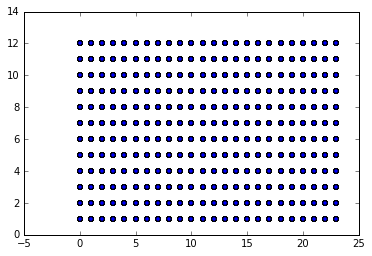

In [177]:
date_time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in dft.tlPayDateTime];


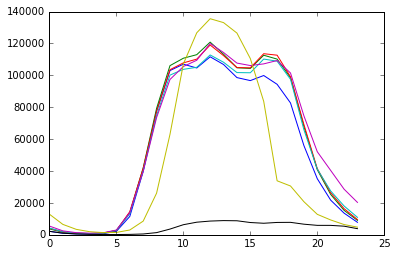

In [478]:
plt.hold(True)
for i in range(7):
    plt.plot(Counter([d.hour for d in date_time if d.weekday()==i]).values())


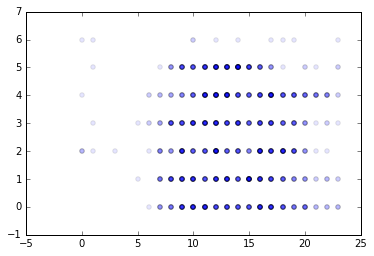

In [217]:
d_ = random.sample(date_time,1000);
plt.scatter([d.hour for d in d_], [d.weekday() for d in d_], alpha = 0.1)

In [474]:
dfs = dft.loc[dft.tlExpDateTime.map(type)!= float].sample(frac = 5/1000)

utc0 = datetime.fromtimestamp(0)
tlPay= [(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - utc0).total_seconds() for t in dfs.tlPayDateTime]
tlExp= [(datetime.strptime(t, '%Y-%m-%d %H:%M:%S') - utc0).total_seconds() for t in dfs.tlExpDateTime]
tlPayDate = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in dfs.tlPayDateTime];

In [476]:
tPark = [(b-a)/3600 for a,b in zip(tlPay,tlExp)]


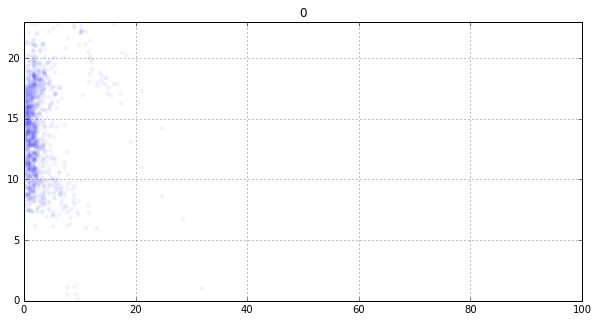

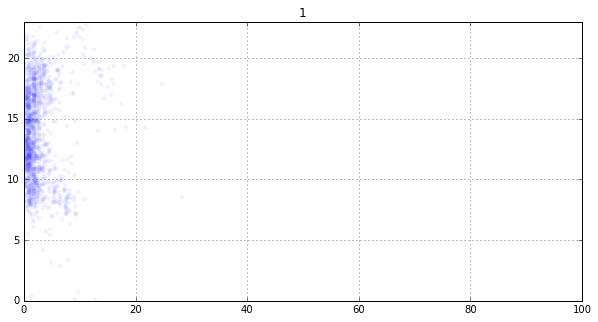

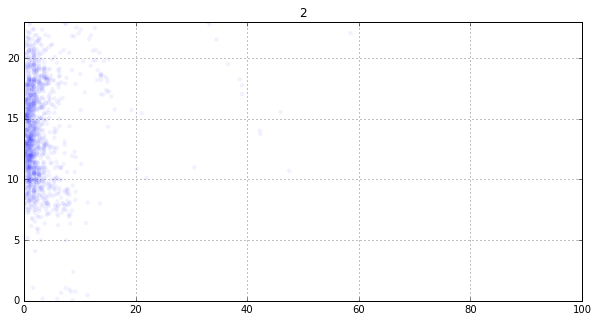

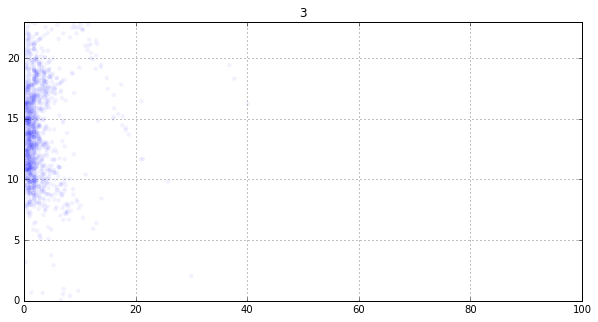

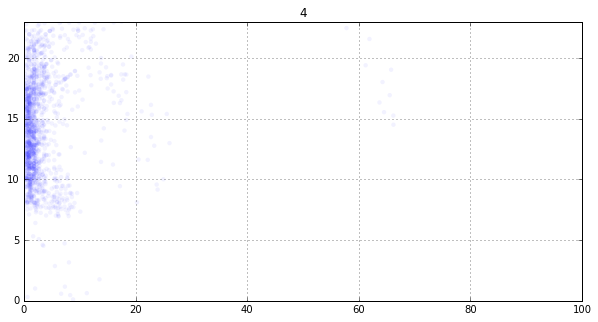

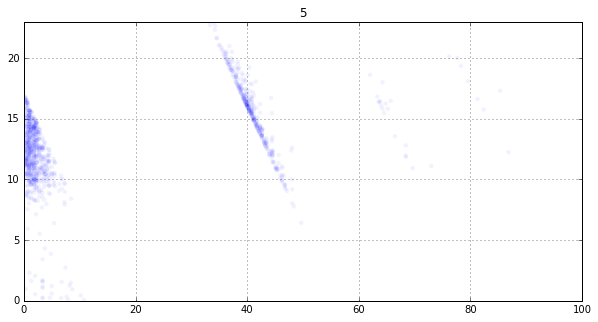

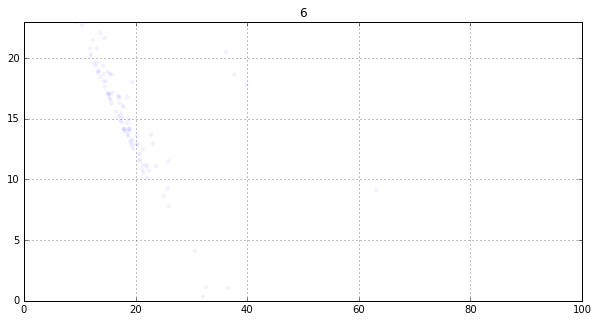

In [470]:
for i in range(7):
    plt.figure(figsize=(10,5))
    x = [d.hour+d.minute/60 for d in tlPayDate if d.weekday() == i]
    y = [t for t,d in zip(tPark,tlPayDate) if d.weekday() == i]
    plt.scatter(y, x, alpha=0.05, edgecolors = 'none');
    plt.ylim(0, 23)
    plt.xlim(0, 100)
    plt.grid(True)
    plt.title(i)

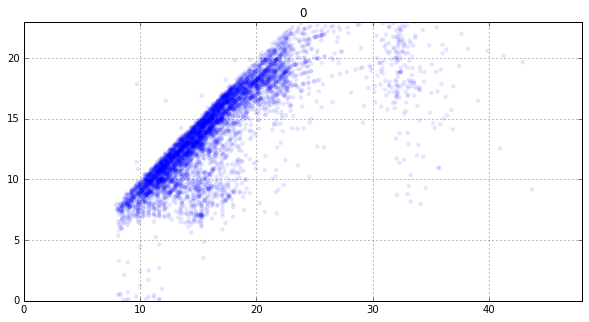

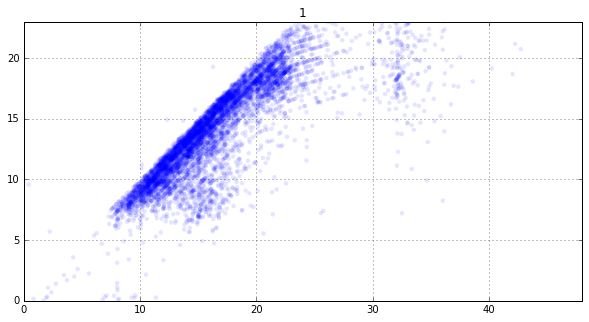

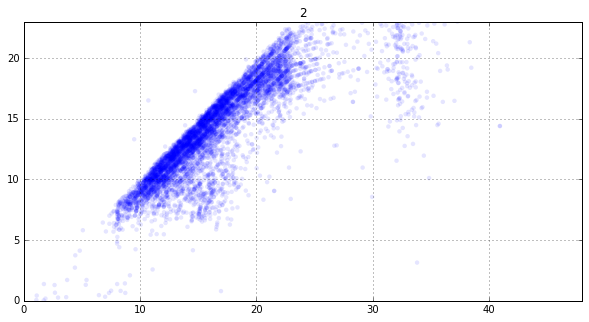

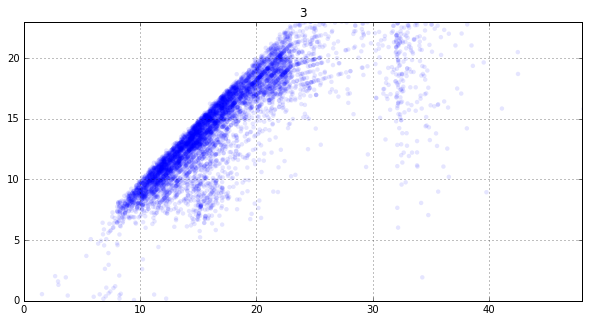

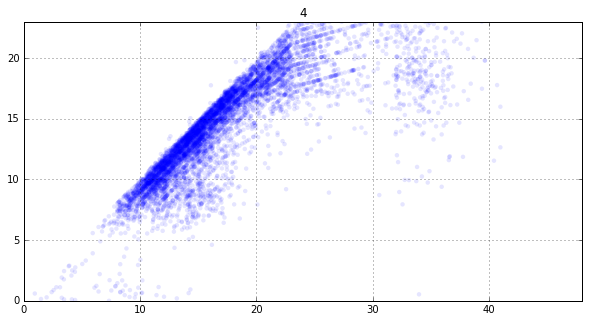

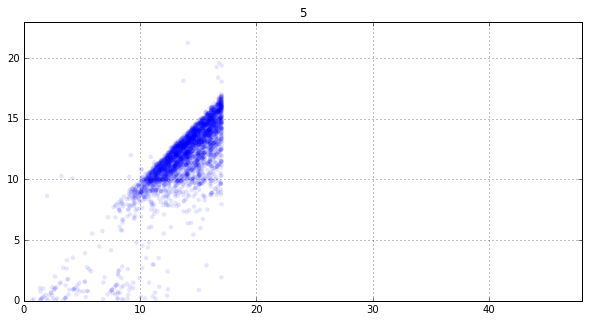

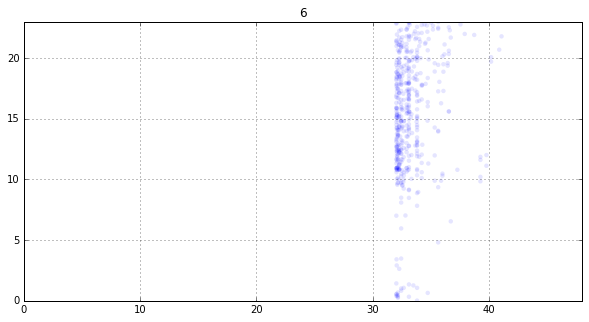

In [477]:
for i in range(7):
    plt.figure(figsize=(10,5))
    x = [d.hour+d.minute/60 for d in tlPayDate if d.weekday() == i]
    y = [(d.hour+d.minute/60+t) for t,d in zip(tPark,tlPayDate) if d.weekday() == i]
    plt.scatter(y, x, alpha=0.1, edgecolors = 'none');
    plt.ylim(0, 23)
    plt.xlim(0, 48)
    plt.grid(True)
    plt.title(i)

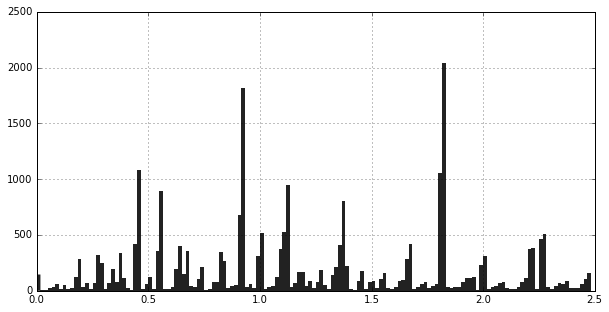

In [462]:
plt.figure(figsize=(10,5))
plt.hist(tPark, np.arange(0,2.5,1/60), edgecolor = 'none', color='#222222');
plt.grid(True)

In [665]:
zone = [(x[0].lower() if (type(x)==str) else 'w') for x in df.p_zone]

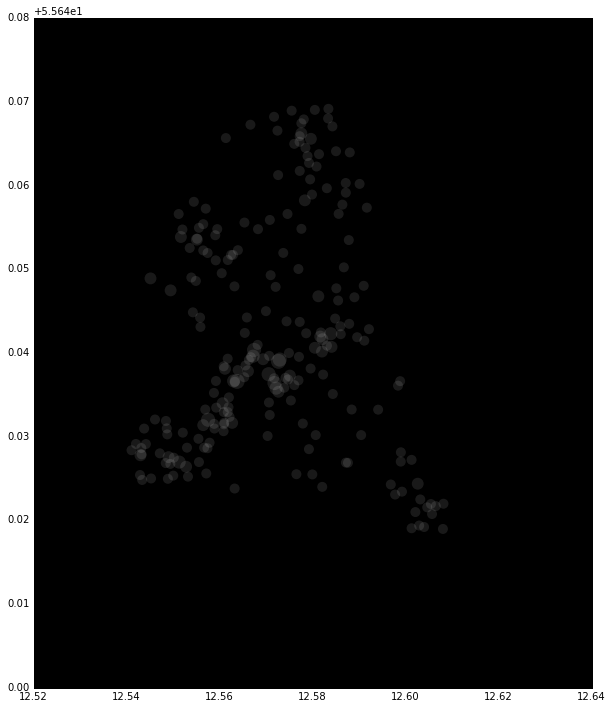

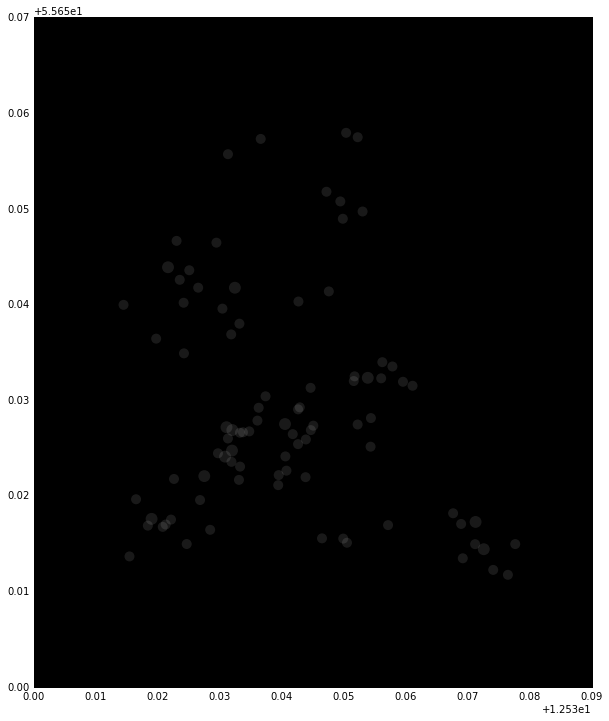

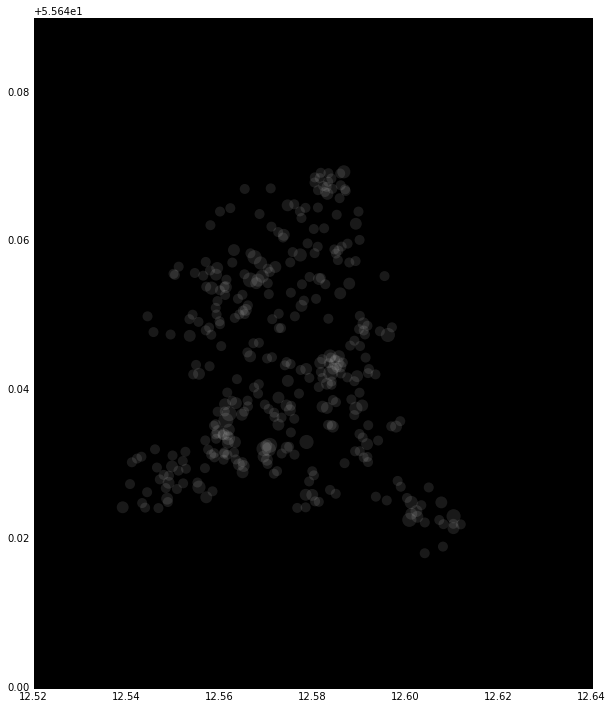

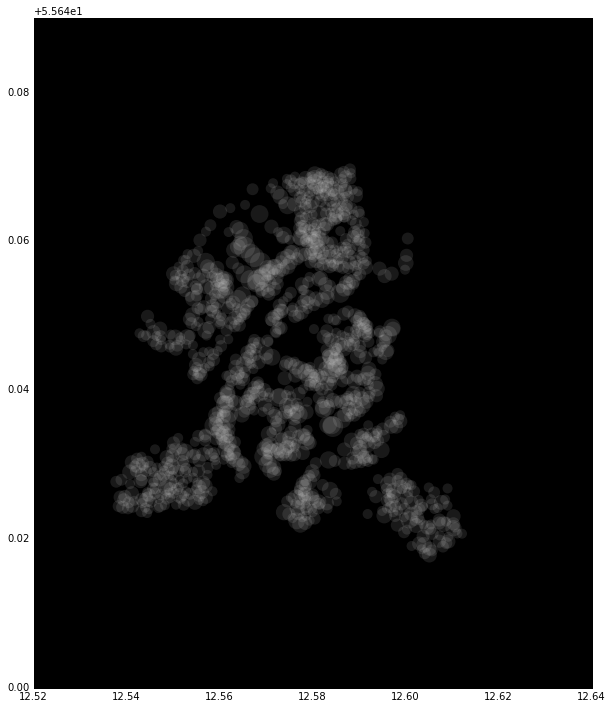

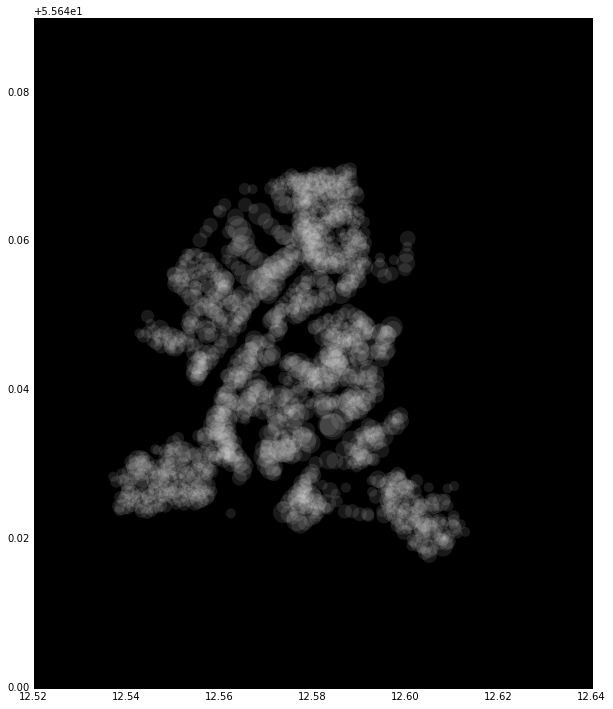

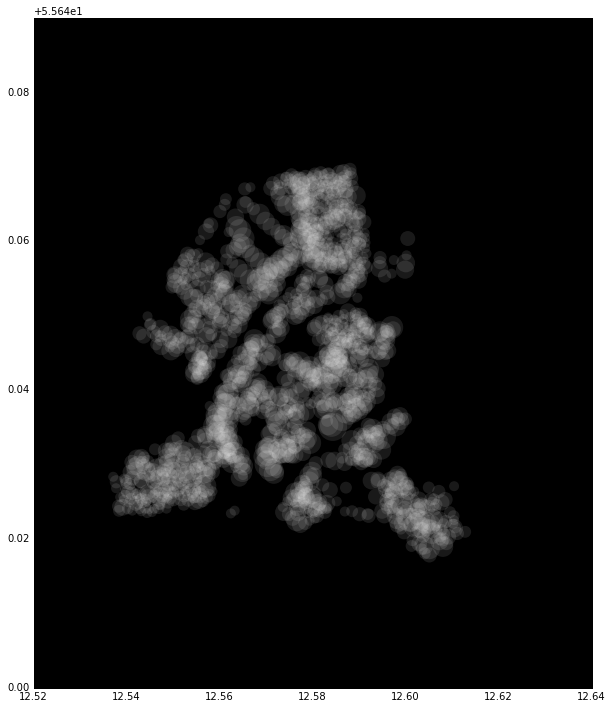

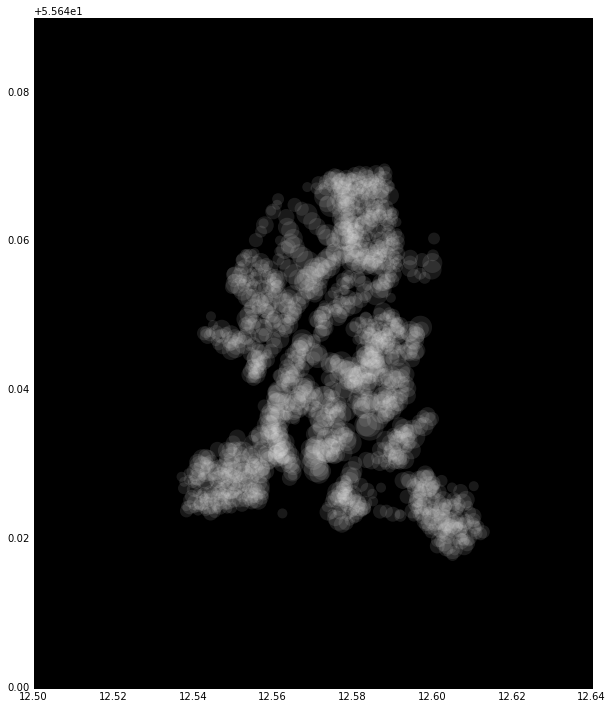

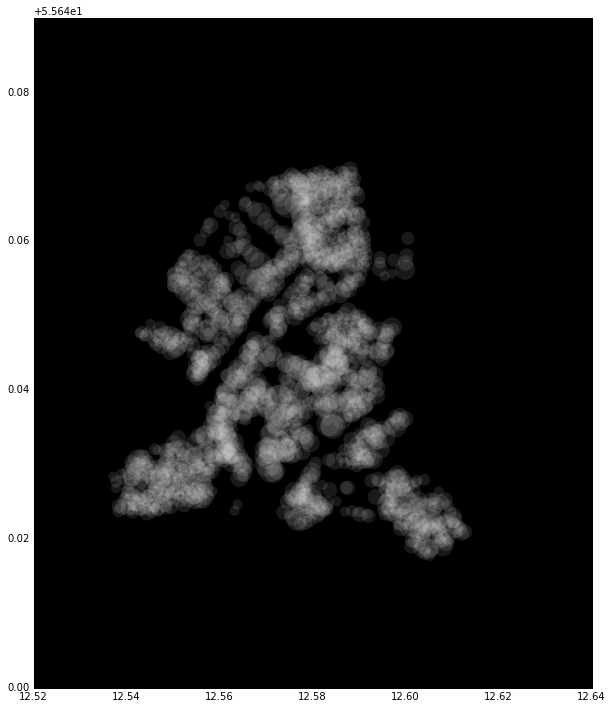

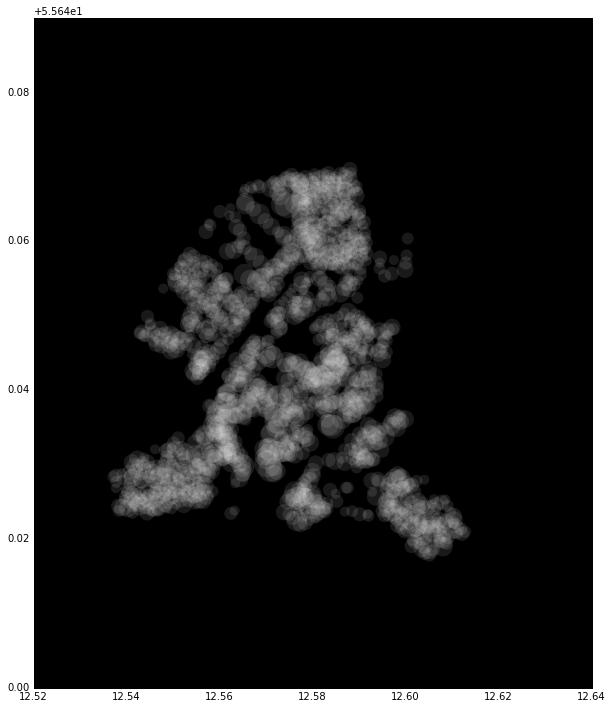

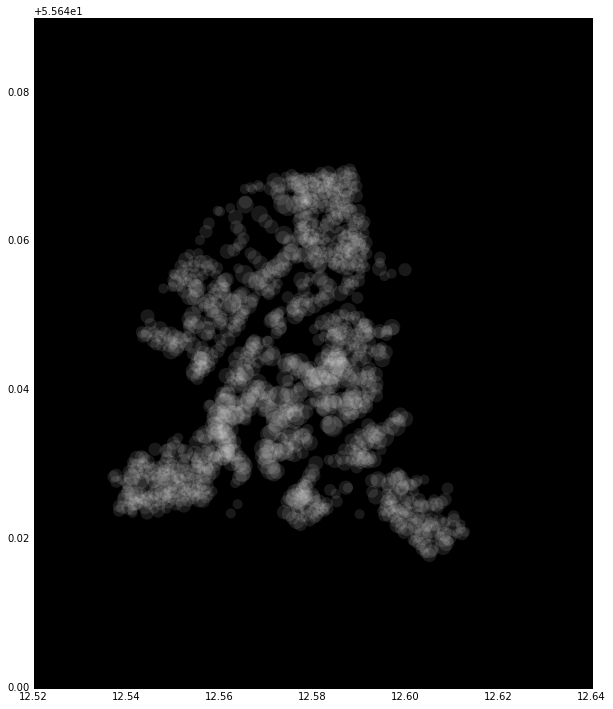

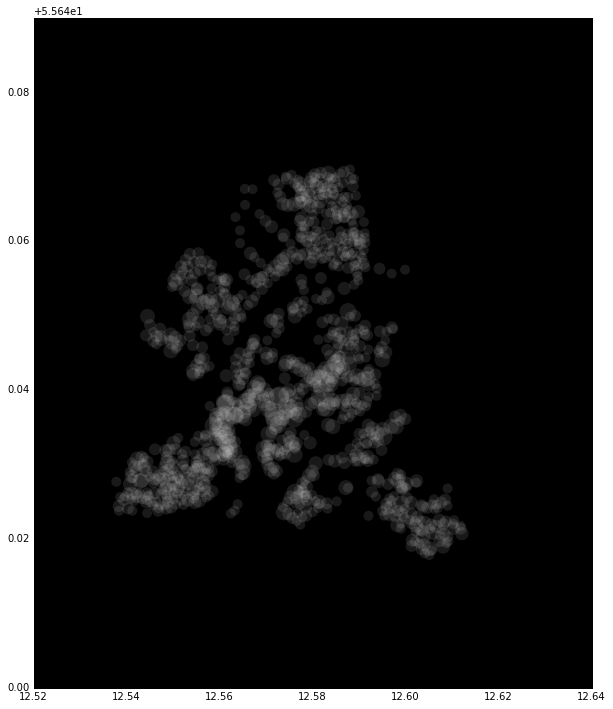

In [678]:

for j in np.arange(0,22,2):
    k = j+2
    elem = [x.hour>=j and x.hour<=k for x in tlPayDate]
    c = Counter(dfs.tlPDM.loc[elem])
    parkings = [c[idx] for idx in df.parkomat_id]
    fig = plt.figure(figsize=(10,12))
    
    scale = 100
    ax = plt.scatter(df.lon, df.lat, s=[x*scale for x in np.sqrt(parkings)], color='w',edgecolor='none', alpha = 0.1)
    plt.axes().set_axis_bgcolor('black')